In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#implementacion del DataSet utilizando la libreria pandas
datos = pd.read_csv(r'C:\Users\diego\Documents\USFX\IA\Datasets\miami-housing.csv')
datos

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [3]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [4]:
# Leer datos separados por una coma
# data = np.loadtxt('ex1data1.txt', delimiter=',')
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
# data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/machine learning/datasets/ex1data1.txt', delimiter=',')
# data = np.loadtxt('/content/miami-housing.txt', delimiter=',')
# data = datos.values
y = datos.values[:, 3]
data, mu, sigma = featureNormalize(datos.values)
X = data[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16]]

m = y.size  # m = numero de ejemplos de entrenamiento
X = np.column_stack((np.ones(m), X)) # Se añade la fila de unos correspondientes a la primera variable del modelo

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.124240,-0.374974,-0.688421,-0.895569,-1.073043,-0.973193,-0.802161,-0.152197,1.356321,1.717578,0.442866
1,1.0,0.124240,-0.421685,-0.688421,-0.645771,-1.195979,-0.974014,-0.780616,-0.170324,1.713909,1.528474,0.442866
2,1.0,0.124240,0.267920,2.854008,-0.637063,-1.200202,-0.977425,-0.779819,-0.170856,1.726350,1.433921,0.442866
3,1.0,0.630840,-0.000055,0.033873,-0.609205,-1.223937,-1.002323,-0.771474,-0.166592,1.778074,1.528474,0.442866
4,1.0,0.688502,-0.459791,0.512474,-0.693636,-1.185271,-0.974953,-0.777654,-0.160834,1.677394,0.535674,0.442866
...,...,...,...,...,...,...,...,...,...,...,...,...
13927,1.0,-0.303282,-1.341158,-0.214715,-0.729069,-0.632188,-0.729758,-1.446995,-1.307022,-1.121550,-0.693506,0.442866
13928,1.0,-0.184663,-0.250820,-0.505274,-0.769682,-0.619462,-0.744399,-1.440771,-1.299499,-1.151078,-0.220744,0.442866
13929,1.0,-0.026505,-0.967468,-0.539830,-0.680719,-0.646971,-0.701600,-1.484767,-1.294256,-1.150172,-0.693506,0.442866
13930,1.0,-0.184663,-0.547068,-0.462655,-0.706019,-0.633631,-0.701541,-1.468874,-1.293128,-1.169550,-0.693506,0.442866


In [5]:
pd.DataFrame(y)

,0
0,440000.0
1,349000.0
2,800000.0
3,988000.0
4,755000.0
...,...
13927,275000.0
13928,340000.0
13929,287500.0
13930,315000.0


# **Usando metodo de la Normal:**

In [6]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

# X_array = [1, 1650, 3]
# price = np.dot(X_array, theta)

# print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 399941.93173988   18640.67850565  158036.53066627   40817.97365337
   30115.60486608  -82723.70120433    4878.80266289 -105986.67448695
    2893.71896138   27427.14057011  -41998.00190268   67337.96479923]


In [8]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [9]:
J = calcularCosto(X, y, theta=np.zeros(12))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = calcularCosto(X, y, theta=np.full(12, 0.5))
print('Con theta = [0.5, 0.5]\n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente)  54.24')

J = calcularCosto(X, y, theta=np.full(12, 0.6))
print('Con theta = [0.6, 0.6]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.full(12, 0.7))
print('Con theta = [0.7, 0.7]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.full(12, 0.8))
print('Con theta = [0.8, 0.8]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.full(12, 0.75))
print('Con theta = [0.75, 0.75]\n Costo calculado = %.2f' % J)

Con theta = [0, 0] 
 Costo calculado = 130285740900.07
Con theta = [0.5, 0.5]
 Costo calculado = 130285398314.38
Con theta = [0.6, 0.6]
 Costo calculado = 130285329797.82
Con theta = [0.7, 0.7]
 Costo calculado = 130285261281.46
Con theta = [0.8, 0.8]
 Costo calculado = 130285192765.30
Con theta = [0.75, 0.75]
 Costo calculado = 130285227023.36


In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        # print(theta)
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        # print("Costo calculado: ", calcularCosto(X, y, theta))
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history
# inicializa los parametros de ajuste
theta = np.full(12, .15)

# configuraciones para el descenso por el gradiente
iterations = 1000
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
# print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Theta encontrada por descenso gradiente:', theta)
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print(J_history)

Theta encontrada por descenso gradiente: [399924.66575427  15809.19613264 157401.1172611   40762.98820864
  29454.47023205 -67619.09157671 -15636.78591081 -73445.27283617
 -25437.27978413  30135.18563713 -39208.23029802  66759.2702095 ]
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]
[127351231107.85623, 124506768653.87178, 121748962670.0717, 119074662952.41356, 116480850849.13736, 113964633234.19385, 111523236773.89323, 109154002471.89157, 106854380478.41013, 104621925150.32431, 102454290349.45602, 100349224967.06529, 98304568663.16296, 96318247809.85876, 94388271628.51886, 92512728511.03865, 90689782516.03807, 88917670031.26268, 87194696593.92348, 85519233861.13538, 83889716723.01686, 82304640551.3965, 80762558577.43341, 79262079391.80167, 77801864561.41345, 76380626356.96326, 74997125585.867, 73650169525.44577, 72338609951.46548, 71061341257.3921, 69817298659.95636, 68605456486.844696, 67424826542.54449, 66274456548.57138, 65153428654.49594, 64060858016.36722, 629958914

Text(0, 0.5, 'Costo J')

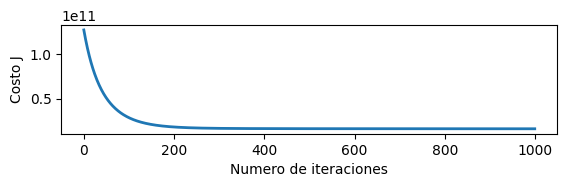

In [11]:
# Grafica la convergencia del costo
ax = plt.subplot(313)
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

In [16]:
test = [1, 15000, 2000, 3000, 2000, 4000, 3000, 5000, 7000, 9000, 20, 3]
test[1:] = (test[1:]-mu)/sigma
price = np.dpt(test, theta)
price

ValueError: operands could not be broadcast together with shapes (11,) (17,) 